# Multi-Qubit Systems
<hr></hr>

Now that we have presented the full definition for a [single qubit]((https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html#kets-bras-products-and-bases)), in this chapter we will generalize this idea to statevectors with more than one qubit, discuss multi-qubit quantum circuits, and present some important ideas such as [universal gate sets](https://en.wikipedia.org/wiki/Quantum_logic_gate#Universal_quantum_gates), [phase-kickback](https://en.wikipedia.org/wiki/Phase_kickback) and the [no-cloning theorem](https://en.wikipedia.org/wiki/No-cloning_theorem).

## 1. Multi-Qubit States

### 1.1 General Statevectors

In the previous chapter, we arrived at the following definition for a qubit:

$$|q\rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix}, $$

where $\alpha_0$ and $\alpha_1$ are complex numbers such that $|\alpha_0|^2 + |\alpha_1|^2 = 1 .$ 

We also briefly discussed, that a state of this form corresponds to a linear combination of the computation basis states $\{|0\rangle, |1\rangle\} $:

$$
\begin{aligned}
|q\rangle &= \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix} 
\\
\\
|q\rangle &= \alpha_0 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \alpha_1 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
|q\rangle &= \alpha_0 |0\rangle + \alpha_1 |1\rangle.
\end{aligned}
$$

We can then generalize this for $n$ qubits by noting that states of this form will correspond to linear combinations of the basis states $\{|0\rangle, |1\rangle\}^{\otimes n}$. Here, the superscript $^{\otimes n}$ denotes that we are taking the tensor product $n$ times for all possible combinations of $|0\rangle$ and $|1\rangle$:

$$\{|0\rangle, |1\rangle\}^{\otimes n} = \{|\underbrace{0\dots 00}_{n}\rangle, |\underbrace{0\dots 01}_{n}\rangle, \dots, |\underbrace{1\dots 11}_{n}\rangle \}$$

For example, for $n = 3$:

$$\{|0\rangle, |1\rangle\}^3 = \{|000\rangle, |001\rangle, |010\rangle, |011\rangle, |100\rangle, |101\rangle, |110\rangle, |111\rangle \} .$$

It can be seen that for $n$ qubits, there are a total of $N = 2^n$ basis states. So, the general representation of a quantum state for an $n$-qubit system is given by:

$$ |q\rangle = \alpha_{0} |0\dots 00\rangle + \alpha_{1}|0\dots 01\rangle + \dots + \alpha_{N-1}|1 \dots 11\rangle ,$$

where $\alpha_j \in \mathbb{C}$ are the probability amplitudes associated with each basis state. And since their value squared represent probabilities, they must also meet the condition of adding up to $1$:

$$ \sum_{j=0}^{N-1} |\alpha_j|^2 = 1 .$$

We can also write the expresion for a multi-qubit vector more compactly as:

$$ |q\rangle = \sum_{j=0}^{N-1} \alpha_{j} |j\rangle. $$

However, we do have to point out that this is a bit of an abuse of notation since here $j$ is an integer between $0$ and $2^{N-1}$, so we need to clarify what we mean by $|j\rangle$ is the state with binary label that corresponds to that integer value. For example, for $j = 5$:

$$ |5\rangle \sim |101\rangle = |1\rangle \otimes |0\rangle \otimes |1\rangle .$$

It is also important to remember that, just as for the single-qubit case, the basis states $\{|0\rangle, |1\rangle\}^{\otimes n}$ form orthonormal basis because they meet the condition of being orthogonal to each other and normalized. A succinct form to express this is as:

$$ \langle i | j \rangle = \delta_{ij}$$

where $i, j$ denote any of the possible basis states between $0$ and $2^{N-1}$, and $\delta_{ij}$ is known as the Kronecker-delta function, given by:

$$ \delta_{ij} = 
\begin{cases} 
1 \text{, for } i = j 
\\
\\
0 \text{, for } i \neq j
\end{cases} 
$$

We can also represent a general multi-qubit statevector using column-vector notation as:

$$ |q\rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}, \text{ such that:} \; \alpha_j \in \mathbb{C}, \; \text{and} \; \sum_{j=0}^{N-1}|\alpha_j|^2 = 1 , $$

And just like we did for the one-qubit case, we say that all statevectors of this kind belong to a [Hilbert space](https://en.wikipedia.org/wiki/Hilbert_space) $\mathcal{H}$, of size $N = 2^n$, which is often expressed as $\mathcal{H} = \mathbb{C}^{N} $ to clarify that this is a vector space over the complex numbers where each of its vectors is of size $N$.

Let's now look at a few examples in Qiskit.

In [12]:
import numpy as np
from qiskit.quantum_info import Statevector

In [13]:
# Create equal superposition state for 3 qubits (separable)
q_a = Statevector.from_label('+++')

# Display statevector in ket notation
print('Ket notation:')
display(q_a.draw('latex'))

# Display statevector in vector notation
print('Vector notation:')
display(q_a.draw('latex', convention='vector'))

Ket notation:


<IPython.core.display.Latex object>

Vector notation:


<IPython.core.display.Latex object>

In [14]:
# Create 3-qubit entangled state
q_b = 1/np.sqrt(2)*Statevector.from_label('000') + 1/np.sqrt(2)*Statevector.from_label('111')

# Display statevector in ket notation
print('Ket notation:')
display(q_b.draw('latex'))

# Display statevector in vector notation
print('Vector notation:')
display(q_b.draw('latex', convention='vector'))

Ket notation:


<IPython.core.display.Latex object>

Vector notation:


<IPython.core.display.Latex object>

### 1.2 Measurements in Multi-Qubit Systems

Just like for single qubit states, we compute the probability of measuring one of the possible outcomes for a multi-qubit state by taking the norm squared of its corresponding probability amplitude. So, for a state of the form:

$$ |q\rangle = \sum_{j=0}^{N-1} \alpha_{j} |j\rangle, $$

the probability of measuring the $j^{th}$ basis state $|j\rangle$ is given by:

$$\mathbb{P}_j = |\alpha_j|^2 .$$

If a measurement results in the classical outcome $j$, the quantum state will be projected from the superpositon state $|q\rangle$ shown above, to the basis state $|j\rangle$. For example, given the superposition state:

$$ |W\rangle = \frac{1}{\sqrt{3}}|100\rangle + \frac{1}{\sqrt{3}}|010\rangle + \frac{1}{\sqrt{3}}|001\rangle, $$

The probability of measuring each of the three possible basis states is:

$$\mathbb{P}_{001} = \mathbb{P}_{010} = \mathbb{P}_{100} = \left|\frac{1}{\sqrt{3}}\right|^2  = \frac{1}{3}.$$

Furthermore, performing a measurement on superposition state above will project it into only one of the three possible states as:

$$|W\rangle =
\begin{cases}
|001\rangle \text{, with prob: } \mathbb{P}_{001} \\ \\
|010\rangle \text{, with prob: } \mathbb{P}_{010} \\ \\
|100\rangle \text{, with prob: } \mathbb{P}_{100}
\end{cases} 
$$

We can look at a few examples with Qiskit by creating a `Statevector` object and using the `probabilites` method to verify that indeed the array of probabilities we get correspond to the norm square of the probability amplitudes. We can also use the `measure` method to project a superposition state into one of the possible outcomes:

In [28]:
# Create 3-qubit state: |+⟩⊗|l⟩⊗|0⟩
q_c = Statevector.from_label('+l0')

# Display statevector in vector notation
print('Probability Amplitudes:')
display(q_c.draw('latex', convention='vector'))

# Print probabilities of measuring each basis state
probs = q_c.probabilities()
print('Probabilities:\n')
print(probs)

# Measure state once, return
c_result, q_result = q_c.measure()
print('\nClassical Outcome:\n')
print(c_result)
print('\nProjected State:')
display(q_result)

Probability Amplitudes:


<IPython.core.display.Latex object>

Probabilities:

[0.25 0.   0.25 0.   0.25 0.   0.25 0.  ]

Classical Outcome:

010

Projected State:


<IPython.core.display.Latex object>

The process described above works well when we are measuring the totality of qubits of a given statevector. However, a couple of interesting questions arise when dealing with multi-qubit systems: 
1. How do we compute the probability of only measuring part of the state? 
2. What would be the resulting statevector after this measurement takes place? 

In order words, what is the procedure to follow if we measure only $m$ qubits out of a system with a total $n$ qubits (where $m < n$)?

The first thing to note, is that we can rewrite the expression for a superposition state as a sum of Kronecker products of the qubits that will be measured (let's call these system $A$), and the ones will not be measured (let's call these system $B$). For example, let us take the $|W\rangle$ state we defined above, and assume we only want to measure the least significant qubit. We can then rewrite the state as:

$$ |W\rangle = \frac{1}{\sqrt{3}}|10\rangle_B \otimes |0\rangle_A + \frac{1}{\sqrt{3}}|01\rangle_B \otimes |0\rangle_A + \frac{1}{\sqrt{3}}|00\rangle_B \otimes |1\rangle_A $$

Since $|0\rangle_A$ appears twice, let's factorize it:

$$ |W\rangle = \left( \frac{1}{\sqrt{3}}|10\rangle_B + \frac{1}{\sqrt{3}}|01\rangle_B \right) \otimes  |0\rangle_A + \left( \frac{1}{\sqrt{3}}|00\rangle_B \right) \otimes |1\rangle_A $$


For now, let's assume the qubits to be measured are the $m$ least significant qubits, so we can rewrite the state as:

$$ |q\rangle = \sum_{l=0}^{N-M} \alpha_{l} |l\rangle \otimes \sum_{k=0}^{M-1} \alpha_{k} |k\rangle, $$

For, example, let's assume we have a general 3-qubit state:

$$ |q\rangle = \alpha_7|111\rangle + \alpha_6|110\rangle + \alpha_5|101\rangle + \alpha_4|100\rangle + \alpha_3|011\rangle + \alpha_2|010\rangle + \alpha_1|001\rangle + \alpha_0|000\rangle $$


## 2. Multi-Qubit Gates and Circuits

Just as we pointed out for the [single-qubit case](https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html#generalizing-quantum-gates), any multi-qubit gate or circuit can be expressed in the form of a [unitary matrix](https://en.wikipedia.org/wiki/Unitary_matrix) $U$. For a system of $n$ qubits, the matrices will be of size $N \times N$, with $N = 2^n$:

$$ U = \begin{bmatrix}u_{00} & u_{01} & \dots & u_{0 (N-1)} \\
                      u_{10} & u_{11} & \dots & u_{1 (N-1)} \\
                      \vdots & \vdots & \ddots & \vdots \\
                      u_{(N-1)0} & u_{(N-1)1} & \dots & u_{1 (N-1)}
\end{bmatrix} $$

As we've seen in previous chapters, gates acting on individual qubits that are part of a larger multi-qubit system can be combined into a single unitary by taking the Kronecker product between them:

$$ U = \bigotimes_{j=0}^{N-1} U_j .$$

Let's look at an example in Qiskit where we apply gates $X, H, Z$ on qubits $0$, $1$ and $2$, respectively:

$$ U = Z \otimes H \otimes X .$$

We will first create the individual matrices for each gate and apply the Kronecker (tensor) product between them, and compare this with the total unitary (operator) for the whole circuit.

In [19]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

In [26]:
# Compute total Unitary (operator) by tensoring gates
X = Operator.from_label('X')
H = Operator.from_label('H')
Z = Operator.from_label('Z')

ZHX = Z.tensor(H.tensor(X))
ZHX.draw('latex', prefix='U =')

<IPython.core.display.Latex object>

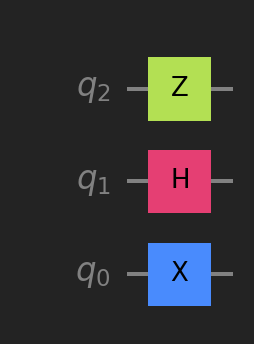

In [22]:
qc = QuantumCircuit(3)
qc.x(0)
qc.h(1)
qc.z(2)
qc.draw()

In [27]:
# Operator from total circuit matches that of tensor product of individual matrices
Operator(qc).draw('latex', prefix='U =')

<IPython.core.display.Latex object>

Unitaries composed of tensor products of single-qubit unitaries are only a small fraction of all possible operations that can act on a multi-qubit state. For example the matrices for the $CX$ or the Toffoli ($CCX$) gates, which we covered before, cannot be expressed in terms of tensor products of other unitaries. We will therefore focus our attention on a few popular/common gates, and later show that any multi-qubit unitary can actually be decomposed into combinations of other gates that are part of what is known as a universal gate-set.

### 2.1 Controlled Gates

Just like the $CX$ gate is a controlled version of an $X$ gate, we can make any other single-qubit gate into a controlled version of itself.

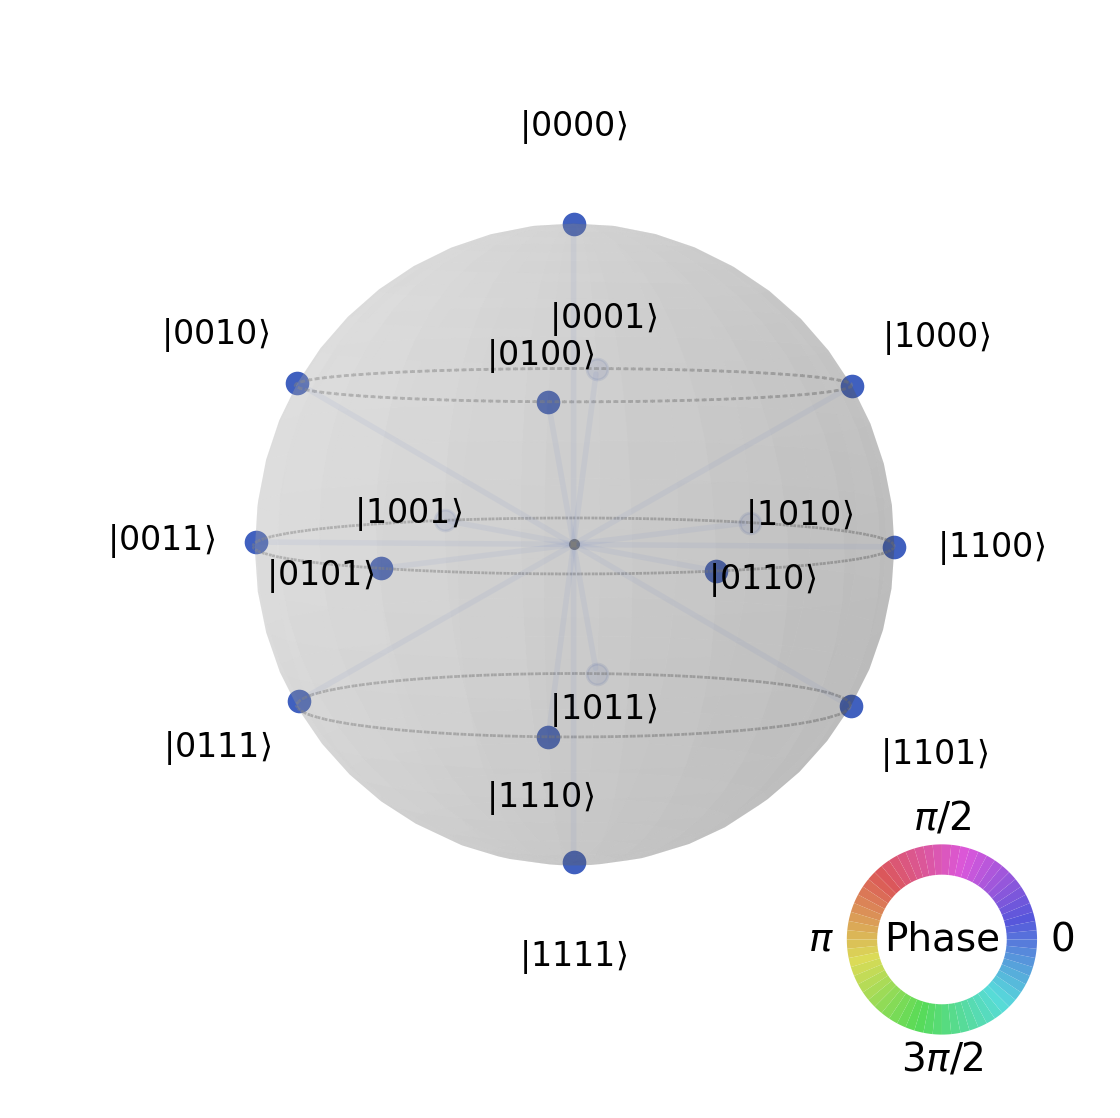

In [25]:
import matplotlib.pyplot as plt

plt.style.use('default')

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(4)
qc.h(range(4))
Statevector(qc).draw('qsphere')